<a href="https://colab.research.google.com/github/sharminislamshroddha/machine_learning/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [ ]:
from sklearn.datasets import load_iris, make_moons, make_blobs

# from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

from scipy import stats

import numpy as np

from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

## **Load Dataset**

In [ ]:
iris_data = load_iris()

X = iris_data.data

y = iris_data.target

## **Dataset Exploration**

In [ ]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

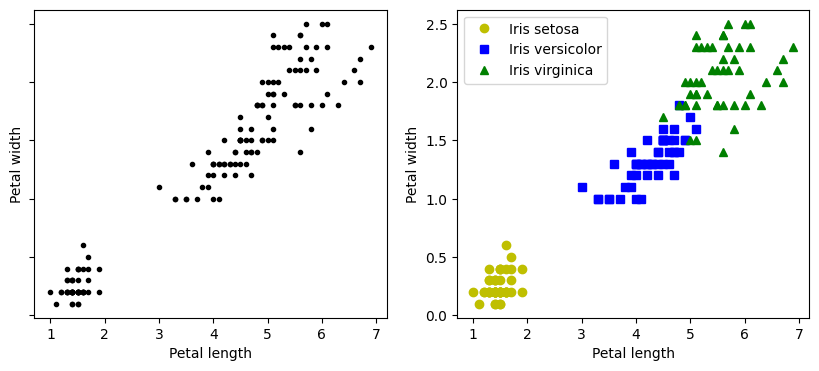

In [ ]:
# plotting the dataset

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.tick_params(labelleft=False)

plt.subplot(122)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

## **Clustering using GaussianMixture Model**

<ipython-input-28-da15b84b087a>:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(y_pred[y==class_id])


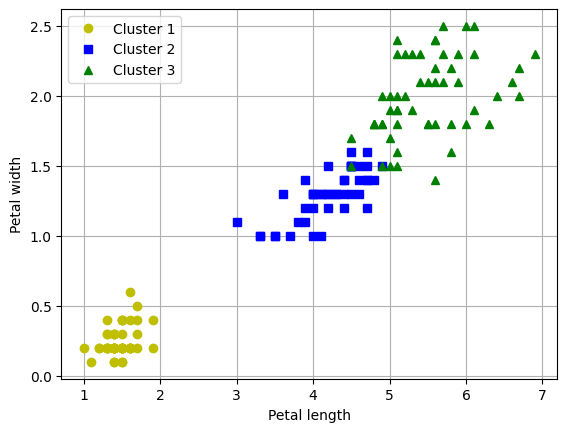

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)

gmm.fit(X)

y_pred = gmm.predict(X)

mapping = {}

for class_id in np.unique(y):
   
    mode, _ = stats.mode(y_pred[y==class_id])
   
    mapping[mode[0]] = class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [ ]:
accuracy = (y_pred==y).sum()/len(y_pred)

print('Accuracy: {0}'.format(accuracy))

Accuracy: 0.9666666666666667


## **K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


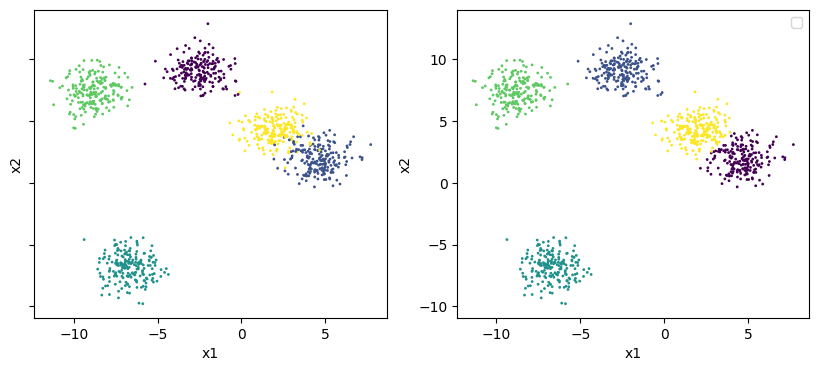

In [ ]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=42)

k = 5

kmeans = KMeans(n_clusters=k, random_state=42)

y_pred = kmeans.fit_predict(X)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.tick_params(labelleft=False)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.legend()

plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 4.65960568,  1.89528052],
       [-2.50265159,  9.03963769],
       [-6.68630691, -6.81139455],
       [-8.80798056,  7.40425704],
       [ 2.01603476,  4.27139248]])

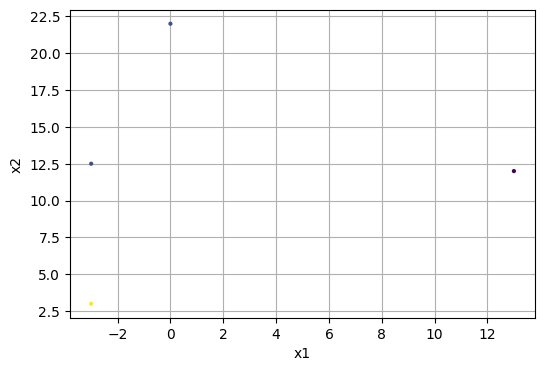

In [ ]:
X_new = np.array([[0, 22], [13, 12], [-3, 3], [-3, 12.5]])

y_pred = kmeans.predict(X_new)

plt.figure(figsize=(6, 4))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred, s=4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

#### **Soft clustering**

In [ ]:
kmeans.transform(X_new).round(2)

array([[20.64, 13.2 , 29.58, 17.05, 17.84],
       [13.1 , 15.78, 27.23, 22.29, 13.43],
       [ 7.74,  6.06, 10.48,  7.29,  5.17],
       [13.08,  3.5 , 19.66,  7.73,  9.64]])

## **DBSCAN**

In [ ]:
X, y = make_moons(n_samples=50000, noise=0.05, random_state = 42)

dbscan = DBSCAN(eps=0.03, min_samples=5)

labels = dbscan.fit_predict(X)

In [ ]:
dbscan.labels_[:50]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1])

In [ ]:
dbscan.core_sample_indices_[:50]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
# dbscan.components_

<ipython-input-50-ea2ff88953ac>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1], s=20, c=color, edgecolors='k')


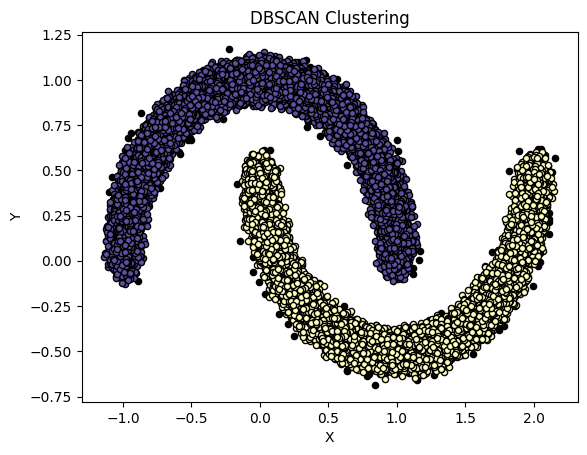

In [ ]:
# Plotting the clusters
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Outliers are labeled as -1
        color = 'k'

    class_member_mask = (labels == label)
    xy = X[class_member_mask]

    plt.scatter(xy[:, 0], xy[:, 1], s=20, c=color, edgecolors='k')

plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
